In [122]:
# load modules

import xarray as xr               # Open and process module outputs (.nc files)
import numpy as np                # Process outputs
import matplotlib.pyplot as plt   # Create figures
from scipy.ndimage import gaussian_filter
import warnings
warnings.filterwarnings("ignore")

In [123]:
# Define the paths where the model outputs are stored 

path_dyn = '/scratch/network/AOS578/datasets_3/dataset_9km_w.nc' # 2d - physical variables
path_bio = '/scratch/network/AOS578/datasets_3/dataset_9km_no3.nc' # 2d - biogeochemical variables


In [124]:
# Open files with physical outputs
dataset_dynamics = xr.open_dataset(path_dyn) 
# Open files with biological outputs
dataset_biology  = xr.open_dataset(path_bio)

In [4]:
dataset_dynamics

<xarray.Dataset>
Dimensions:    (dayofyear: 365, z_l: 58, yh: 362, xh: 362)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
  * z_l        (z_l) float64 1.0 3.0 5.0 7.0 9.0 ... 765.4 837.0 914.7 998.6
  * yh         (yh) float64 19.94 20.06 20.17 20.28 ... 59.72 59.83 59.94 60.06
  * xh         (xh) float64 -55.06 -54.94 -54.83 -54.72 ... -15.17 -15.06 -14.94
Data variables:
    w          (dayofyear, z_l, yh, xh) float32 ...

In [6]:
dataset_dynamics
# only slicing to 50N
datanew_dyn = dataset_dynamics.sel(yh=slice(20, 50))

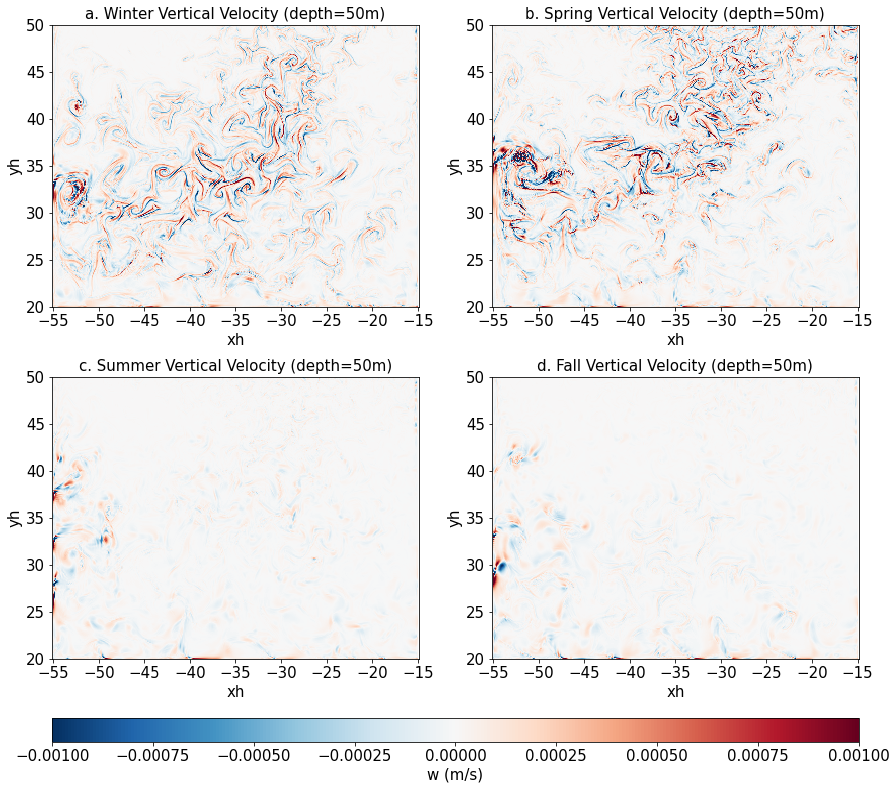

In [18]:
# Problem 1ai, 50 meters

#datanew_dyn.w.sel(dayofyear=4, z_l=50, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r')

fig = plt.figure(figsize=(14,11))
z=50
s=15

plt.subplot(221)
datanew_dyn.w.sel(dayofyear=355, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('a. Winter Vertical Velocity (depth=50m)', fontsize=15), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(222)
datanew_dyn.w.sel(dayofyear=80, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('b. Spring Vertical Velocity (depth=50m)', fontsize=15), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(223)
datanew_dyn.w.sel(dayofyear=172, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('c. Summer Vertical Velocity (depth=50m)', fontsize=15), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(224)
im =datanew_dyn.w.sel(dayofyear=265, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('d. Fall Vertical Velocity (depth=50m)', fontsize=15), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.25)

cbaxes = fig.add_axes([0.1,-0.005, 0.8, 0.03])  
cb = plt.colorbar(im, cax = cbaxes, orientation = 'horizontal')
cb.ax.tick_params(labelsize=s)
cb.set_label('w (m/s)', fontsize=s)

plt.savefig("fig1.pdf", format="pdf", bbox_inches="tight")

#surf_large_p_conc_subtropical = dataset_biology_3d.nlg.sel(xh = -40.5, yh = 26.5, z_l=2.5)

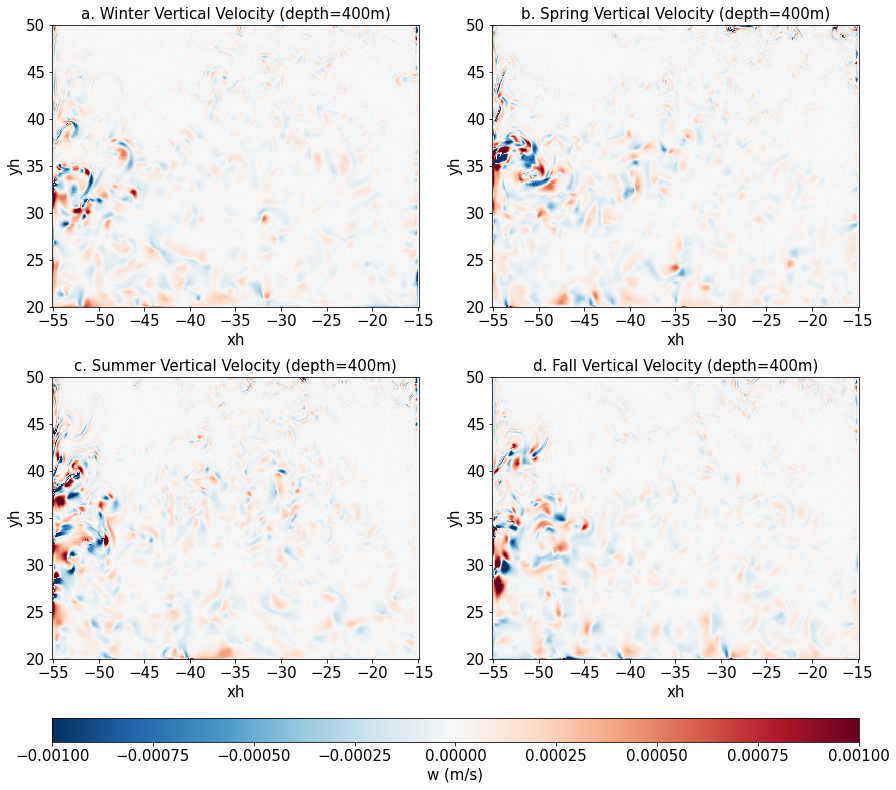

In [19]:
# Problem 1ai, 400 meters

#datanew_dyn.w.sel(dayofyear=4, z_l=50, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r')

fig = plt.figure(figsize=(14,11))
z=400

plt.subplot(221)
datanew_dyn.w.sel(dayofyear=355, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('a. Winter Vertical Velocity (depth=400m)', fontsize=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(222)
datanew_dyn.w.sel(dayofyear=80, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('b. Spring Vertical Velocity (depth=400m)', fontsize=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(223)
datanew_dyn.w.sel(dayofyear=172, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('c. Summer Vertical Velocity (depth=400m)', fontsize=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(224)
im = datanew_dyn.w.sel(dayofyear=265, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('d. Fall Vertical Velocity (depth=400m)', fontsize=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.25)

cbaxes = fig.add_axes([0.1,-0.005, 0.8, 0.03])  
cb = plt.colorbar(im, cax = cbaxes, orientation = 'horizontal')
cb.ax.tick_params(labelsize=s)
cb.set_label('w (m/s)', fontsize=s)

plt.savefig("fig2.pdf", format="pdf", bbox_inches="tight")

#surf_large_p_conc_subtropical = dataset_biology_3d.nlg.sel(xh = -40.5, yh = 26.5, z_l=2.5)

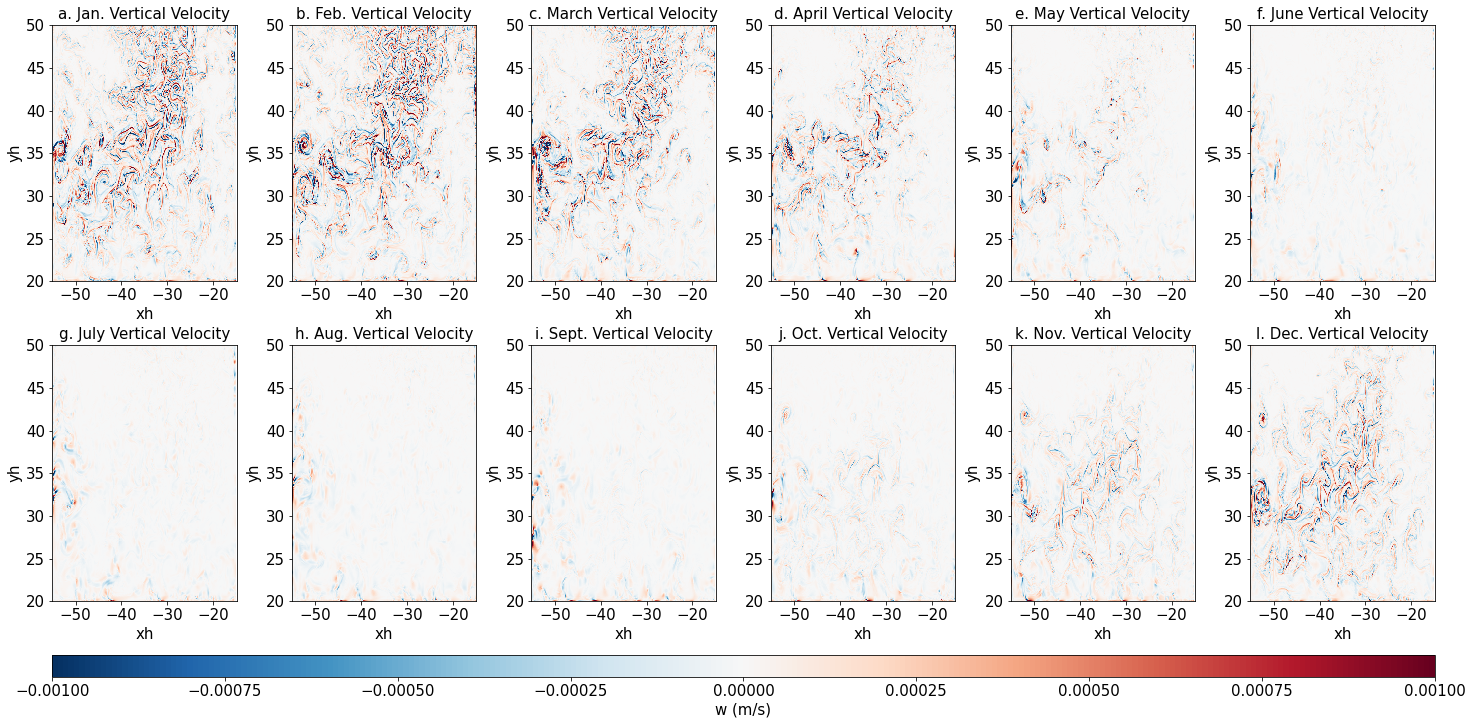

In [20]:
# 1ai is written

#1aii seasonality
# Problem 1ai, 50 meters

#datanew_dyn.w.sel(dayofyear=4, z_l=50, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r')

fig = plt.figure(figsize=(24,10))
z=50
s = 15

plt.subplot(2,6,1)
datanew_dyn.w.sel(dayofyear=15, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('a. Jan. Vertical Velocity', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(2,6,2)
datanew_dyn.w.sel(dayofyear=46, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('b. Feb. Vertical Velocity', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(2,6,3)
datanew_dyn.w.sel(dayofyear=74, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('c. March Vertical Velocity', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(2,6,4)
datanew_dyn.w.sel(dayofyear=105, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('d. April Vertical Velocity', size=s),plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(2,6,5)
datanew_dyn.w.sel(dayofyear=135, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('e. May Vertical Velocity', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(2,6,6)
datanew_dyn.w.sel(dayofyear=166, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('f. June Vertical Velocity', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(2,6,7)
datanew_dyn.w.sel(dayofyear=196, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('g. July Vertical Velocity', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(2,6,8)
datanew_dyn.w.sel(dayofyear=227, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('h. Aug. Vertical Velocity', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(2,6,9)
datanew_dyn.w.sel(dayofyear=258, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('i. Sept. Vertical Velocity', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(2,6,10)
datanew_dyn.w.sel(dayofyear=288, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('j. Oct. Vertical Velocity', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(2,6,11)
datanew_dyn.w.sel(dayofyear=319, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('k. Nov. Vertical Velocity', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(2,6,12)
im = datanew_dyn.w.sel(dayofyear=349, z_l=z, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title('l. Dec. Vertical Velocity', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

cbaxes = fig.add_axes([0.1,-0.005, 0.8, 0.03])  
cb = plt.colorbar(im, cax = cbaxes, orientation = 'horizontal')
cb.ax.tick_params(labelsize=s)
cb.set_label('w (m/s)', fontsize=s)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.25)

plt.savefig("fig3.pdf", format="pdf", bbox_inches="tight")

#surf_large_p_conc_subtropical = dataset_biology_3d.nlg.sel(xh = -40.5, yh = 26.5, z_l=2.5)

In [35]:
# 1b gaussian filtering

# create a numpy array of filtered values
filter_array = np.zeros((365,362,362))
z = 50

# do filtering separately for each day, radius is roughly ~150km
for i in range(365):
    x = gaussian_filter(dataset_dynamics.w.sel(dayofyear=i+1, z_l=z, method="nearest").fillna(0).astype(np.float32), sigma=4)
    
    filter_array[i,:,:] = x

In [36]:
# convert this back to xarray
w_bar = xr.DataArray(filter_array, coords={'dayofyear': dataset_dynamics['dayofyear'].values,'yh': dataset_dynamics['yh'].values,'xh': dataset_dynamics['xh'].values}, dims=["dayofyear", "yh", "xh"])
w_bar


<xarray.DataArray (dayofyear: 365, yh: 362, xh: 362)>
array([[[ 4.51485403e-06,  4.64158938e-06,  4.96656139e-06, ...,
          4.89264603e-05,  4.83412587e-05,  4.80299641e-05],
        [ 4.77384765e-06,  4.88667501e-06,  5.18044135e-06, ...,
          4.62306052e-05,  4.56922571e-05,  4.54072433e-05],
        [ 5.26029908e-06,  5.34952187e-06,  5.58930878e-06, ...,
          4.12751579e-05,  4.08268024e-05,  4.05920691e-05],
        ...,
        [-1.30993949e-05, -1.58265702e-05, -2.04796761e-05, ...,
         -3.88089666e-06, -7.72489147e-06, -9.85351562e-06],
        [-1.44178175e-05, -1.70385192e-05, -2.14993670e-05, ...,
         -3.88442868e-06, -8.54570953e-06, -1.11167737e-05],
        [-1.50020905e-05, -1.75510613e-05, -2.18828718e-05, ...,
         -3.79974858e-06, -8.88754676e-06, -1.16895208e-05]],

       [[-4.73219234e-06, -4.62541402e-06, -4.29404554e-06, ...,
          4.95365457e-05,  4.91219325e-05,  4.89200393e-05],
        [-4.45597925e-06, -4.35902894e-06, -4.05209130e-06, ...,
          4.70098239e-05,  4.66598904e-05,  4.64932891e-05],
        [-3.93084974e-06, -3.85154772e-06, -3.58936313e-06, ...,
          4.23789206e-05,  4.21523218e-05,  4.20528158e-05],
...
        [-2.58241253e-05, -2.75562561e-05, -3.04048099e-05, ...,
         -1.91968466e-05, -2.00712875e-05, -2.05604629e-05],
        [-2.84720172e-05, -2.99904586e-05, -3.24520515e-05, ...,
         -1.95457615e-05, -2.11770530e-05, -2.21072041e-05],
        [-2.98379618e-05, -3.12324082e-05, -3.34700744e-05, ...,
         -1.96004512e-05, -2.16395656e-05, -2.28070821e-05]],

       [[-3.34129363e-05, -3.09713760e-05, -2.64040209e-05, ...,
          2.46110667e-05,  2.33909359e-05,  2.26568354e-05],
        [-3.35209479e-05, -3.09840798e-05, -2.62448575e-05, ...,
          2.27728615e-05,  2.14532065e-05,  2.06677960e-05],
        [-3.38345017e-05, -3.11188160e-05, -2.60588058e-05, ...,
          1.96013698e-05,  1.81072537e-05,  1.72321816e-05],
        ...,
        [-2.55788782e-05, -2.73542319e-05, -3.02597109e-05, ...,
         -1.58236653e-05, -1.65996516e-05, -1.70379626e-05],
        [-2.75444399e-05, -2.91290125e-05, -3.16949045e-05, ...,
         -1.56575843e-05, -1.72572691e-05, -1.81756441e-05],
        [-2.85558890e-05, -3.00278753e-05, -3.23937238e-05, ...,
         -1.54449863e-05, -1.74900670e-05, -1.86674060e-05]]])
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
  * yh         (yh) float64 19.94 20.06 20.17 20.28 ... 59.72 59.83 59.94 60.06
  * xh         (xh) float64 -55.06 -54.94 -54.83 -54.72 ... -15.17 -15.06 -14.94

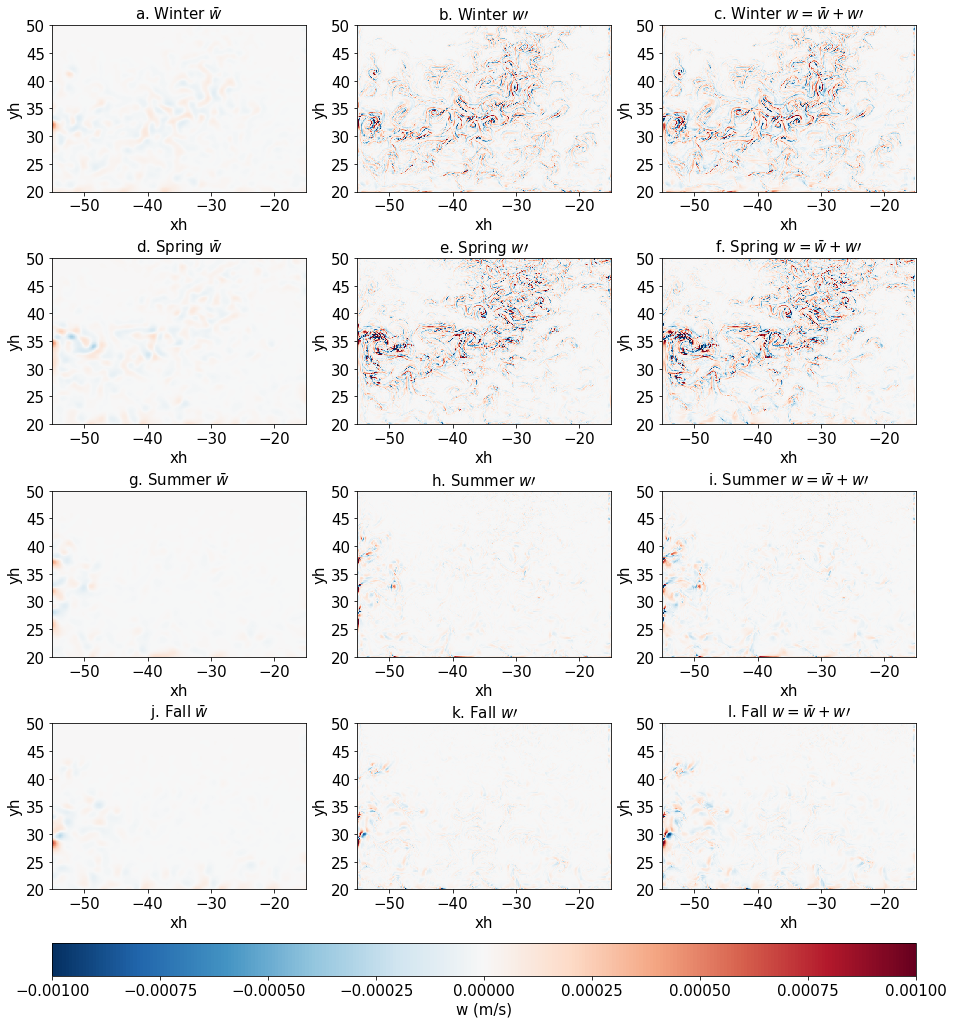

In [37]:
# 1ai is written

#1aii seasonality
# Problem 1ai, 50 meters

#datanew_dyn.w.sel(dayofyear=4, z_l=50, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r')

fig = plt.figure(figsize=(15,15))
z=50
s = 15

plt.subplot(4,3,1)
w_bar.sel(dayofyear=355).sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'a. Winter $\bar{w}$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,2)
(dataset_dynamics.w.sel(dayofyear=355, z_l=z, method="nearest").sel(yh=slice(20, 50)) - w_bar.sel(dayofyear=355)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'b. Winter $w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,3)
dataset_dynamics.w.sel(dayofyear=355, z_l=z, method="nearest").sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r',add_colorbar=False)
plt.title(r'c. Winter $w = \bar{w} + w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)


plt.subplot(4,3,4)
w_bar.sel(dayofyear=80).sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'd. Spring $\bar{w}$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,5)
(dataset_dynamics.w.sel(dayofyear=80, z_l=z, method="nearest").sel(yh=slice(20, 50)) - w_bar.sel(dayofyear=80)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'e. Spring $w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,6)
dataset_dynamics.w.sel(dayofyear=80, z_l=z, method="nearest").sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r',add_colorbar=False)
plt.title(r'f. Spring $w = \bar{w} + w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)


plt.subplot(4,3,7)
w_bar.sel(dayofyear=172).sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'g. Summer $\bar{w}$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,8)
(dataset_dynamics.w.sel(dayofyear=172, z_l=z, method="nearest").sel(yh=slice(20, 50)) - w_bar.sel(dayofyear=172)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'h. Summer $w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,9)
dataset_dynamics.w.sel(dayofyear=172, z_l=z, method="nearest").sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r',add_colorbar=False)
plt.title(r'i. Summer $w = \bar{w} + w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)


plt.subplot(4,3,10)
w_bar.sel(dayofyear=265).sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'j. Fall $\bar{w}$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,11)
(dataset_dynamics.w.sel(dayofyear=265, z_l=z, method="nearest").sel(yh=slice(20, 50)) - w_bar.sel(dayofyear=265)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'k. Fall $w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,12)
dataset_dynamics.w.sel(dayofyear=265, z_l=z, method="nearest").sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r',add_colorbar=False)
plt.title(r'l. Fall $w = \bar{w} + w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)


cbaxes = fig.add_axes([0.1,0.02, 0.8, 0.03]) 
cb = plt.colorbar(im, cax = cbaxes, orientation = 'horizontal')
cb.ax.tick_params(labelsize=s)
cb.set_label('w (m/s)', fontsize=s)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

plt.savefig("fig4.pdf", format="pdf", bbox_inches="tight")
#surf_large_p_conc_subtropical = dataset_biology_3d.nlg.sel(xh = -40.5, yh = 26.5, z_l=2.5)

In [38]:
# do again for depth 400 m
# 1b gaussian filtering

# create a numpy array of filtered values
filter_array = np.zeros((365,362,362))
z = 400

# do filtering separately for each day, radius is roughly ~150km
for i in range(365):
    x = gaussian_filter(dataset_dynamics.w.sel(dayofyear=i+1, z_l=z, method="nearest").fillna(0).astype(np.float32), sigma=4)
    
    filter_array[i,:,:] = x

In [39]:
# convert this back to xarray
w_bar = xr.DataArray(filter_array, coords={'dayofyear': dataset_dynamics['dayofyear'].values,'yh': dataset_dynamics['yh'].values,'xh': dataset_dynamics['xh'].values}, dims=["dayofyear", "yh", "xh"])


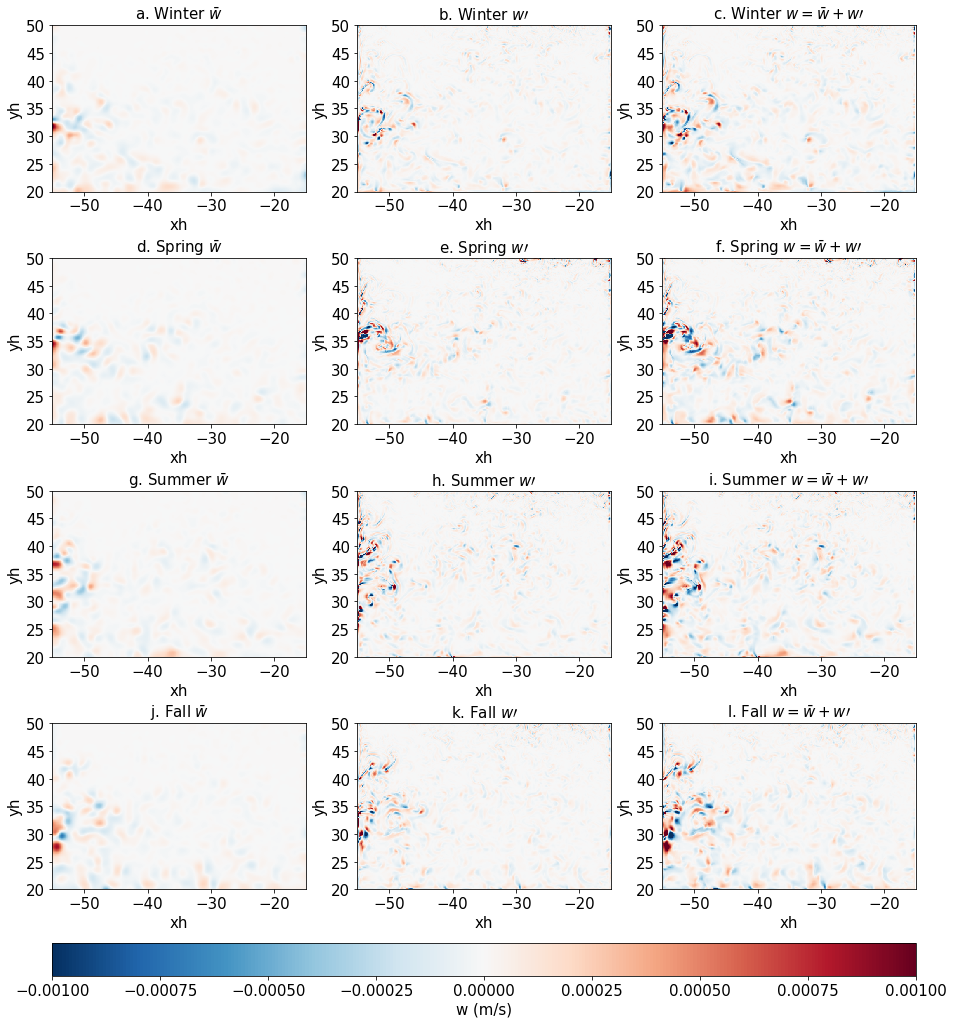

In [40]:
# 1ai is written

#1aii seasonality
# Problem 1ai, 50 meters

#datanew_dyn.w.sel(dayofyear=4, z_l=50, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r')

fig = plt.figure(figsize=(15,15))
z=400
s = 15

plt.subplot(4,3,1)
w_bar.sel(dayofyear=355).sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'a. Winter $\bar{w}$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,2)
(dataset_dynamics.w.sel(dayofyear=355, z_l=z, method="nearest").sel(yh=slice(20, 50)) - w_bar.sel(dayofyear=355)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'b. Winter $w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,3)
dataset_dynamics.w.sel(dayofyear=355, z_l=z, method="nearest").sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r',add_colorbar=False)
plt.title(r'c. Winter $w = \bar{w} + w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)


plt.subplot(4,3,4)
w_bar.sel(dayofyear=80).sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'd. Spring $\bar{w}$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,5)
(dataset_dynamics.w.sel(dayofyear=80, z_l=z, method="nearest").sel(yh=slice(20, 50)) - w_bar.sel(dayofyear=80)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'e. Spring $w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,6)
dataset_dynamics.w.sel(dayofyear=80, z_l=z, method="nearest").sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r',add_colorbar=False)
plt.title(r'f. Spring $w = \bar{w} + w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)


plt.subplot(4,3,7)
w_bar.sel(dayofyear=172).sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'g. Summer $\bar{w}$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,8)
(dataset_dynamics.w.sel(dayofyear=172, z_l=z, method="nearest").sel(yh=slice(20, 50)) - w_bar.sel(dayofyear=172)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'h. Summer $w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,9)
dataset_dynamics.w.sel(dayofyear=172, z_l=z, method="nearest").sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r',add_colorbar=False)
plt.title(r'i. Summer $w = \bar{w} + w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)


plt.subplot(4,3,10)
w_bar.sel(dayofyear=265).sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'j. Fall $\bar{w}$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,11)
(dataset_dynamics.w.sel(dayofyear=265, z_l=z, method="nearest").sel(yh=slice(20, 50)) - w_bar.sel(dayofyear=265)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r', add_colorbar=False)
plt.title(r'k. Fall $w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(4,3,12)
dataset_dynamics.w.sel(dayofyear=265, z_l=z, method="nearest").sel(yh=slice(20, 50)).plot(vmin = -.001, vmax = .001, cmap='RdBu_r',add_colorbar=False)
plt.title(r'l. Fall $w = \bar{w} + w\prime$', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)


cbaxes = fig.add_axes([0.1,0.02, 0.8, 0.03])  
cb = plt.colorbar(im, cax = cbaxes, orientation = 'horizontal')
cb.ax.tick_params(labelsize=s)
cb.set_label('w (m/s)', fontsize=s)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

plt.savefig("fig5.pdf", format="pdf", bbox_inches="tight")
#surf_large_p_conc_subtropical = dataset_biology_3d.nlg.sel(xh = -40.5, yh = 26.5, z_l=2.5)

In [43]:
# do again for depth 400 m
# 1b gaussian filtering

# create a numpy array of filtered values
z_values = np.zeros((365,362,362))

# do filtering separately for each day, radius is roughly ~150km
for i in range(365):
    diffe = dataset_biology.w.sel(dayofyear=i+1).diff('z_l')
    diff2 = diffe.fillna(0).astype(np.float32)
    loc = diff2.argmax(dim='z_l')
    
    z_values[i,:,:] = diffe.z_l[loc]

In [44]:
# convert this back to xarray
z_max = xr.DataArray(z_values, coords={'dayofyear': dataset_dynamics['dayofyear'].values,'yh': dataset_dynamics['yh'].values,'xh': dataset_dynamics['xh'].values}, dims=["dayofyear", "yh", "xh"])


In [45]:
average_nutricline = z_max.mean(dim="dayofyear")

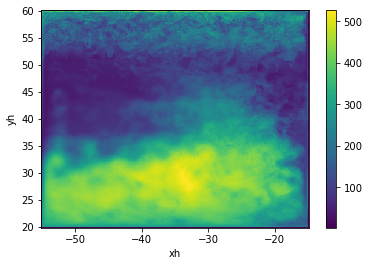

In [46]:
average_nutricline.plot()

In [47]:
# Days of season
diffe = dataset_biology.w.sel(dayofyear=355).diff('z_l')
diff2 = diffe.fillna(0).astype(np.float32)
loc = diff2.argmax(dim='z_l')
nutricline_winter = diffe.z_l[loc]

diffe = dataset_biology.w.sel(dayofyear=80).diff('z_l')
diff2 = diffe.fillna(0).astype(np.float32)
loc = diff2.argmax(dim='z_l')
nutricline_spring = diffe.z_l[loc]

diffe = dataset_biology.w.sel(dayofyear=172).diff('z_l')
diff2 = diffe.fillna(0).astype(np.float32)
loc = diff2.argmax(dim='z_l')
nutricline_summer = diffe.z_l[loc]

diffe = dataset_biology.w.sel(dayofyear=265).diff('z_l')
diff2 = diffe.fillna(0).astype(np.float32)
loc = diff2.argmax(dim='z_l')
nutricline_fall = diffe.z_l[loc]

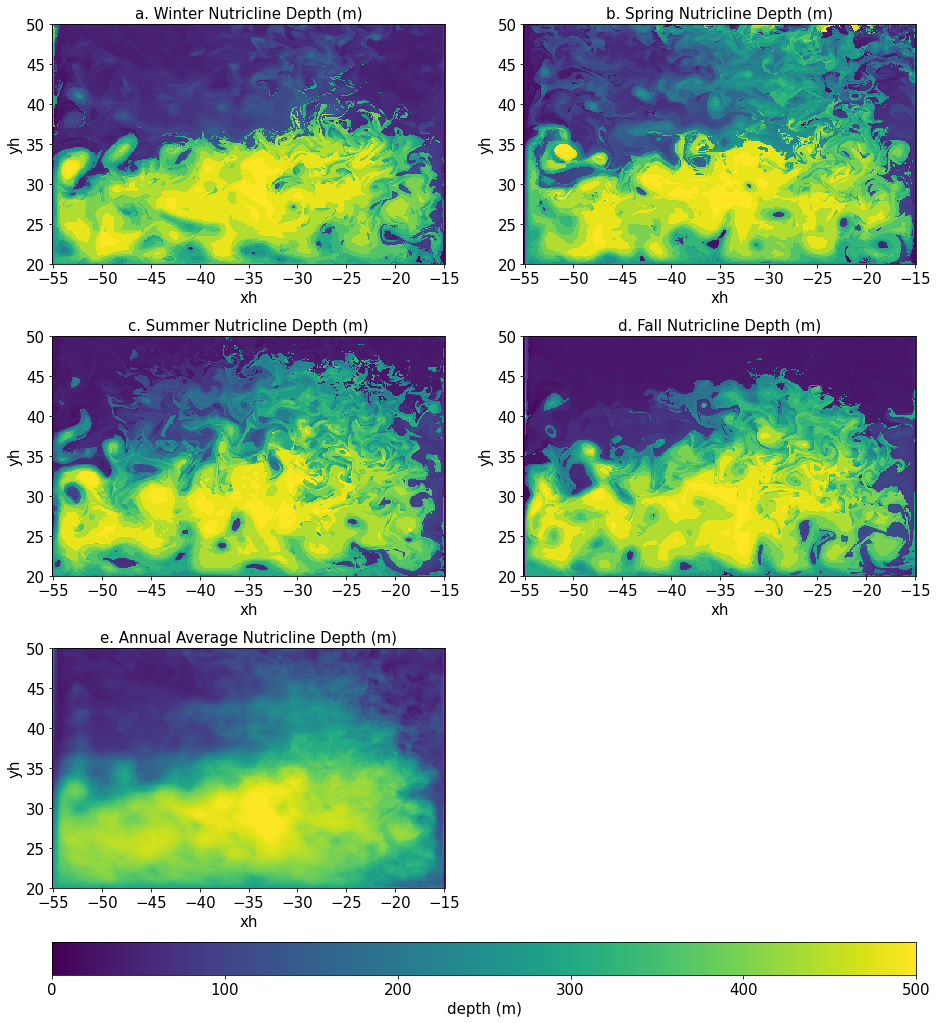

In [89]:
# 1ai is written

#1aii seasonality
# Problem 1ai, 50 meters

#datanew_dyn.w.sel(dayofyear=4, z_l=50, method="nearest").plot(vmin = -.001, vmax = .001, cmap='RdBu_r')

fig = plt.figure(figsize=(15,15))
z=400
s = 15

plt.subplot(3,2,1)
nutricline_winter.sel(yh=slice(20, 50)).plot(vmin = 0, vmax = 500, add_colorbar=False)
plt.title(r'a. Winter Nutricline Depth (m)', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(3,2,2)
nutricline_spring.sel(yh=slice(20, 50)).plot(vmin = 0, vmax = 500, add_colorbar=False)
plt.title(r'b. Spring Nutricline Depth (m)', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(3,2,3)
nutricline_summer.sel(yh=slice(20, 50)).plot(vmin = 0, vmax = 500, add_colorbar=False)
plt.title(r'c. Summer Nutricline Depth (m)', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(3,2,4)
nutricline_fall.sel(yh=slice(20, 50)).plot(vmin = 0, vmax = 500, add_colorbar=False)
plt.title(r'd. Fall Nutricline Depth (m)', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)

plt.subplot(3,2,5)
im = average_nutricline.sel(yh=slice(20, 50)).plot(vmin = 0, vmax = 500, add_colorbar=False)
plt.title(r'e. Annual Average Nutricline Depth (m)', size=s), plt.xlabel('xh', fontsize=s), plt.ylabel('yh', fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s)


cbaxes = fig.add_axes([0.1,0.02, 0.8, 0.03])  
cb = plt.colorbar(im, cax = cbaxes, orientation = 'horizontal')
cb.ax.tick_params(labelsize=s)
cb.set_label('depth (m)', fontsize=s)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.3)

plt.savefig("fig6.pdf", format="pdf", bbox_inches="tight")

#surf_large_p_conc_subtropical = dataset_biology_3d.nlg.sel(xh = -40.5, yh = 26.5, z_l=2.5)

In [49]:
subtropical = average_nutricline.sel(yh=slice(20, 30)).mean(dim='xh').mean(dim='yh')
subtropical

<xarray.DataArray ()>
array(389.19815418)

In [50]:
subpolar = average_nutricline.sel(yh=slice(40, 50)).mean(dim='xh').mean(dim='yh')
subpolar

<xarray.DataArray ()>
array(105.25214541)

In [56]:
diffe = dataset_biology.w.sel(yh=slice(20,30)).diff('z_l')
diff2 = diffe.fillna(0).astype(np.float32)
loc = diff2.argmax(dim='z_l')
nutricline_subt = diffe.z_l[loc]

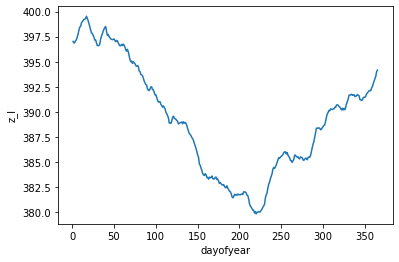

In [60]:
nutricline_subt.mean(dim='xh').mean(dim='yh').plot()

In [61]:
diffe = dataset_biology.w.sel(yh=slice(40,50)).diff('z_l')
diff2 = diffe.fillna(0).astype(np.float32)
loc = diff2.argmax(dim='z_l')
nutricline_subp = diffe.z_l[loc]

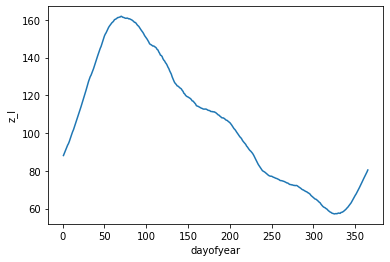

In [62]:
nutricline_subp.mean(dim='xh').mean(dim='yh').plot()

In [76]:
subp_mean = nutricline_subp.mean(dim='xh').mean(dim='yh').mean('dayofyear')
subt_mean = nutricline_subt.mean(dim='xh').mean(dim='yh').mean('dayofyear')
subp_mean

<xarray.DataArray 'z_l' ()>
array(105.25214541)

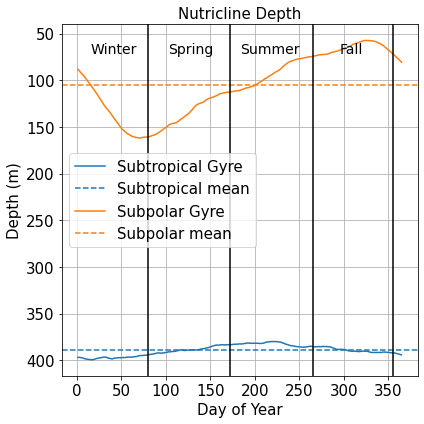

In [88]:
# graph seasonally 

from matplotlib.dates import DateFormatter

s=15

plt.figure(figsize=(6,6))

# Here we plot mixed layer and mixing layer depth for all 3 biomes 
# given data is in m

ax1 = plt.subplot(111)
nutricline_subt.mean(dim='xh').mean(dim='yh').plot(label='Subtropical Gyre')
plt.axhline(y = subt_mean, color = 'tab:blue', linestyle='dashed', label = 'Subtropical mean')
nutricline_subp.mean(dim='xh').mean(dim='yh').plot(label='Subpolar Gyre')
plt.gca().invert_yaxis(), plt.title('Nutricline Depth', fontsize=15), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel("Day of Year", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid(), 
plt.axhline(y = subp_mean, color = 'tab:orange', linestyle='dashed', label = 'Subpolar mean')
plt.axvline(x = 80, color = 'k')
plt.axvline(x = 172, color = 'k')
plt.axvline(x = 265, color = 'k')
plt.axvline(x = 355, color = 'k')
plt.legend(fontsize=s)

ax1.text(0.08, 0.95, 'Winter', transform=ax1.transAxes, fontsize=14, verticalalignment='top')
ax1.text(0.3, 0.95, 'Spring', transform=ax1.transAxes, fontsize=14, verticalalignment='top')
ax1.text(0.5, 0.95, 'Summer', transform=ax1.transAxes, fontsize=14, verticalalignment='top')
ax1.text(0.78, 0.95, 'Fall', transform=ax1.transAxes, fontsize=14, verticalalignment='top')

plt.tight_layout()

In [93]:
-dataset_dynamics.w.sel(dayofyear=355, xh=-30,yh=30,method='nearest').diff('z_l')

<xarray.DataArray 'w' (z_l: 57)>
array([ 9.7677375e-06,  8.9144687e-06,  8.1216658e-06,  7.3788360e-06,
        6.6830689e-06,  6.0315397e-06,  5.4335615e-06,  4.8715701e-06,
        4.3404143e-06,  3.8488070e-06,  3.3884062e-06,  2.9600342e-06,
        2.5482586e-06,  2.1463857e-06,  1.7559141e-06,  1.3642129e-06,
        9.5641735e-07,  5.1873212e-07,  3.0297088e-08, -5.3527765e-07,
       -1.2116870e-06, -2.0484877e-06, -3.1136005e-06, -4.2758620e-06,
       -3.9514562e-06, -4.2598404e-06, -6.3328371e-06, -8.5415595e-06,
       -1.3764355e-05, -5.2644355e-06,  7.5301541e-06,  7.6986034e-06,
        6.4344458e-06,  4.8396578e-06,  4.0314262e-06,  3.7065402e-06,
        3.6735655e-06,  3.6091806e-06,  3.3619799e-06,  2.8924260e-06,
        2.1704691e-06,  1.7887287e-06,  1.6609629e-06,  1.0017247e-06,
       -4.8894435e-09, -7.0251554e-07, -1.0918957e-06, -2.4102919e-06,
       -2.9979419e-06, -1.9958388e-06, -1.7364728e-06, -1.4118341e-06,
       -1.0109216e-06, -9.2742266e-07,  8.1380858e-07,  2.0412190e-06,
                  nan], dtype=float32)
Coordinates:
    dayofyear  int64 355
  * z_l        (z_l) float64 3.0 5.0 7.0 9.0 11.0 ... 765.4 837.0 914.7 998.6
    yh         float64 29.94
    xh         float64 -30.06

In [90]:
dataset_dynamics.w.sel(dayofyear=355, xh=-30,yh=30,method='nearest')

<xarray.DataArray 'w' (z_l: 58)>
array([-5.105870e-06, -1.487361e-05, -2.378808e-05, -3.190974e-05,
       -3.928858e-05, -4.597165e-05, -5.200319e-05, -5.743675e-05,
       -6.230832e-05, -6.664873e-05, -7.049754e-05, -7.388595e-05,
       -7.684598e-05, -7.939424e-05, -8.154062e-05, -8.329654e-05,
       -8.466075e-05, -8.561717e-05, -8.613590e-05, -8.616620e-05,
       -8.563092e-05, -8.441923e-05, -8.237075e-05, -7.925714e-05,
       -7.498128e-05, -7.102983e-05, -6.676999e-05, -6.043715e-05,
       -5.189559e-05, -3.813123e-05, -3.286680e-05, -4.039695e-05,
       -4.809556e-05, -5.453000e-05, -5.936966e-05, -6.340109e-05,
       -6.710763e-05, -7.078119e-05, -7.439037e-05, -7.775235e-05,
       -8.064478e-05, -8.281525e-05, -8.460398e-05, -8.626494e-05,
       -8.726666e-05, -8.726177e-05, -8.655926e-05, -8.546736e-05,
       -8.305707e-05, -8.005913e-05, -7.806329e-05, -7.632682e-05,
       -7.491498e-05, -7.390406e-05, -7.297664e-05, -7.379045e-05,
       -7.583167e-05,           nan], dtype=float32)
Coordinates:
    dayofyear  int64 355
  * z_l        (z_l) float64 1.0 3.0 5.0 7.0 9.0 ... 765.4 837.0 914.7 998.6
    yh         float64 29.94
    xh         float64 -30.06

In [91]:
-5.105870e-06 - -1.487361e-05

9.76774e-06

In [6]:
# 3a Decompose w in the sum of w_bar and w_prime, and N in the sum of N_bar and N_prime

# do gaussian filtering for each depth

# create a numpy array of filtered values
filter_array = np.zeros((4,58,362,362))

seasons = [80,172,265,355]

# do at each depth
for z in range(58):
    
    # do filtering separately for each day, one representative day of each season, radius is roughly ~150km
    for i in range(len(seasons)):
        x = gaussian_filter(dataset_dynamics.w.sel(dayofyear=seasons[i],method="nearest").isel(z_l=z).fillna(0).astype(np.float32), sigma=4)
    
        filter_array[i,z,:,:] = x

In [8]:
filter_array.shape

(4, 58, 362, 362)

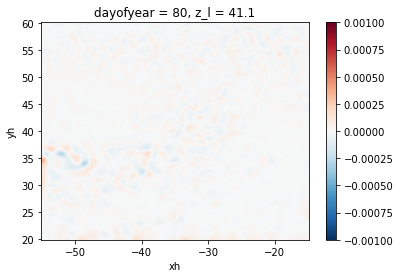

In [17]:
# convert this back to xarray
w_bar = xr.DataArray(filter_array, coords={'dayofyear': seasons,'z_l': dataset_dynamics['z_l'],'yh': dataset_dynamics['yh'].values,'xh': dataset_dynamics['xh'].values}, dims=["dayofyear","z_l", "yh", "xh"])
w_bar.sel(dayofyear=80,z_l=40,method='nearest').plot(vmin=-.001,vmax=.001, cmap='RdBu_r')


In [18]:
# remove extra variables
del filter_array

In [19]:
# decompose into parts 
w_prime = dataset_dynamics.w - w_bar

In [20]:
# 3a Decompose w in the sum of w_bar and w_prime, and N in the sum of N_bar and N_prime

# do gaussian filtering for each depth

# create a numpy array of filtered values
filter_array_n = np.zeros((4,58,362,362))

seasons = [80,172,265,355]

# do at each depth
for z in range(58):
    
    # do filtering separately for each day, one representative day of each season, radius is roughly ~150km
    for i in range(len(seasons)):
        x = gaussian_filter(dataset_biology.w.sel(dayofyear=seasons[i],method="nearest").isel(z_l=z).fillna(0).astype(np.float32), sigma=4)
    
        filter_array_n[i,z,:,:] = x

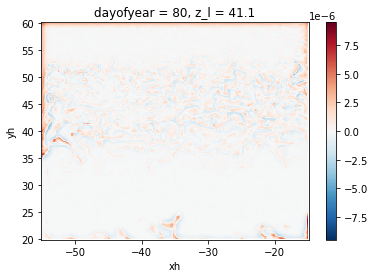

In [27]:
# decomposing n
n_bar = xr.DataArray(filter_array_n, coords={'dayofyear': seasons,'z_l': dataset_dynamics['z_l'],'yh': dataset_dynamics['yh'].values,'xh': dataset_dynamics['xh'].values}, dims=["dayofyear","z_l", "yh", "xh"])
#n_bar.sel(dayofyear=80,z_l=40,method='nearest').plot()

del filter_array_n

n_prime = dataset_biology.w - n_bar

n_prime.sel(dayofyear=80,z_l=40,method='nearest').plot()

In [31]:
# calculating gradients

# gradient of nprime
deltaz = dataset_biology.z_l.diff('z_l')

# negating since up is positive according to w
deltan_prime = - n_prime.diff('z_l')

# negating since up is positive according to w
deltan_bar = - n_bar.diff('z_l')

# gradients
gradient_n_prime = deltan_prime/deltaz
gradient_n_bar = deltan_bar/deltaz

del deltaz, deltan_prime, deltan_bar


In [40]:
# calculating products
large_scale = -w_bar.sel(z_l=slice(3,1000))*gradient_n_bar

small_scale = -w_prime.sel(z_l=slice(3,1000))*gradient_n_prime

In [41]:
# spatial averaging
large_scale_mean = large_scale.mean(dim='yh').mean(dim='xh')
small_scale_mean = small_scale.mean(dim='yh').mean(dim='xh')


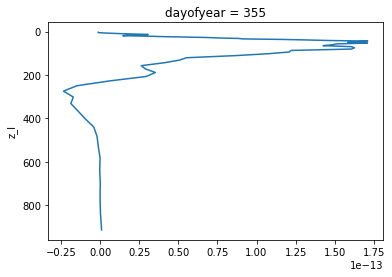

In [57]:
#transposed_data = .transpose()

small_scale_mean.sel(dayofyear=355).plot(y='z_l')
plt.gca().invert_yaxis()


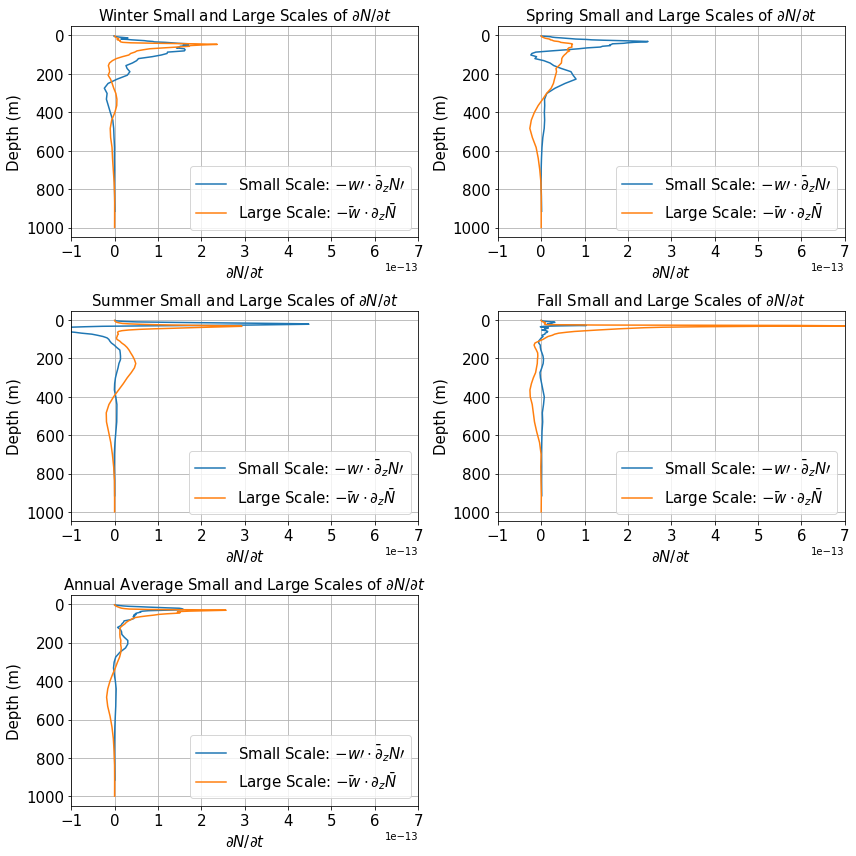

In [97]:
# graph seasonally 

from matplotlib.dates import DateFormatter

s=15

plt.figure(figsize=(12,12))

# Here we plot mixed layer and mixing layer depth for all 3 biomes 
# given data is in m

ax1 = plt.subplot(321)
small_scale_mean.sel(dayofyear=355).plot(y='z_l', label=r'Small Scale: $\bar{-w\prime\cdot\partial_z N\prime}$')
large_scale_mean.sel(dayofyear=355).plot(y='z_l', label=r'Large Scale: $\bar{-w}\cdot\partial_z\bar{N}$ ')
plt.gca().invert_yaxis(), ax1.set_xlim(-1e-13, 7e-13), plt.title(r'Winter Small and Large Scales of $\partial N/\partial t$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"$\partial N/\partial t$", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid()

ax2=plt.subplot(322)
small_scale_mean.sel(dayofyear=80).plot(y='z_l', label=r'Small Scale: $\bar{-w\prime\cdot\partial_z N\prime}$ ')
large_scale_mean.sel(dayofyear=80).plot(y='z_l', label=r'Large Scale: $\bar{-w}\cdot\partial_z\bar{N}$ ')
plt.gca().invert_yaxis(), ax2.set_xlim(-1e-13, 7e-13), plt.title(r'Spring Small and Large Scales of $\partial N/\partial t$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"$\partial N/\partial t$", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid()

ax3=plt.subplot(323)
small_scale_mean.sel(dayofyear=172).plot(y='z_l', label=r'Small Scale: $\bar{-w\prime\cdot\partial_z N\prime}$ ')
large_scale_mean.sel(dayofyear=172).plot(y='z_l', label=r'Large Scale: $\bar{-w}\cdot\partial_z\bar{N}$ ')
plt.gca().invert_yaxis(), ax3.set_xlim(-1e-13, 7e-13), plt.title(r'Summer Small and Large Scales of $\partial N/\partial t$', fontsize=15), plt.ylabel("Depth (m)", fontsize=s), plt.legend(fontsize=s), plt.xlabel(r"$\partial N/\partial t$", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid()

ax4=plt.subplot(324)
small_scale_mean.sel(dayofyear=265).plot(y='z_l', label=r'Small Scale: $\bar{-w\prime\cdot\partial_z N\prime}$ ')
large_scale_mean.sel(dayofyear=265).plot(y='z_l', label=r'Large Scale: $\bar{-w}\cdot\partial_z\bar{N}$ ')
plt.gca().invert_yaxis(), ax4.set_xlim(-1e-13, 7e-13), plt.title(r'Fall Small and Large Scales of $\partial N/\partial t$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"$\partial N/\partial t$", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid()

ax5 = plt.subplot(325)
small_scale_mean.mean(dim='dayofyear').plot(y='z_l', label=r'Small Scale: $\bar{-w\prime\cdot\partial_z N\prime}$')
large_scale_mean.mean(dim='dayofyear').plot(y='z_l', label=r'Large Scale: $\bar{-w}\cdot\partial_z\bar{N}$ ')
plt.gca().invert_yaxis(), ax5.set_xlim(-1e-13, 7e-13), plt.title(r'Annual Average Small and Large Scales of $\partial N/\partial t$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"$\partial N/\partial t$", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid()


plt.tight_layout()

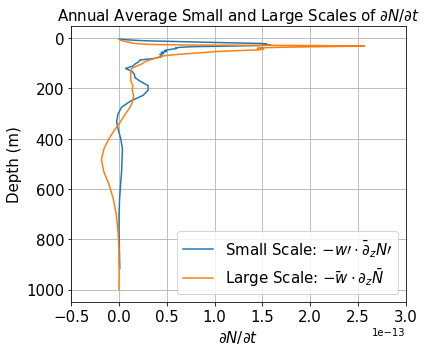

In [91]:
# graph annual average 

from matplotlib.dates import DateFormatter

s=15

plt.figure(figsize=(6,5))

# Here we plot mixed layer and mixing layer depth for all 3 biomes 
# given data is in m

ax1 = plt.subplot(111)
small_scale_mean.mean(dim='dayofyear').plot(y='z_l', label=r'Small Scale: $\bar{-w\prime\cdot\partial_z N\prime}$')
large_scale_mean.mean(dim='dayofyear').plot(y='z_l', label=r'Large Scale: $\bar{-w}\cdot\partial_z\bar{N}$ ')
plt.gca().invert_yaxis(), ax1.set_xlim(-.5e-13, 3e-13), plt.title(r'Annual Average Small and Large Scales of $\partial N/\partial t$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"$\partial N/\partial t$", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid()


plt.tight_layout()

In [ ]:
# small scale decomposition

In [125]:
# winter 

day = 355

x = gaussian_filter(dataset_dynamics.w.sel(dayofyear=day,method="nearest").fillna(0).astype(np.float32), sigma=4)
w_bar = xr.DataArray(x, coords={'z_l': dataset_dynamics['z_l'],'yh': dataset_dynamics['yh'].values,'xh': dataset_dynamics['xh'].values}, dims=["z_l", "yh", "xh"])
w_prime1 = dataset_dynamics.w.sel(dayofyear=day) - w_bar


NO3_mean = gaussian_filter(dataset_biology.w.sel(dayofyear=day).fillna(0).astype(np.float32), sigma=4)
NO3_mean = xr.DataArray(NO3_mean, coords=dataset_biology.w.sel(dayofyear=day).coords, dims=dataset_biology.w.sel(dayofyear=day).dims)
NO3_prime = dataset_biology.w.sel(dayofyear=day) - NO3_mean

dNO3dz_mean = NO3_mean.differentiate('z_l')
dNO3dz_prime1 = NO3_prime.differentiate('z_l')

mean_transport = w_bar * 86000 * dNO3dz_mean
resid_transport = w_prime1 * 86000 * dNO3dz_prime

avg_mean_transport1 = mean_transport.mean(dim=['xh','yh'])
avg_resid_transport1 = resid_transport.mean(dim=['xh','yh'])
    

In [126]:
# Spring 

day = 80

x = gaussian_filter(dataset_dynamics.w.sel(dayofyear=day,method="nearest").fillna(0).astype(np.float32), sigma=4)
w_bar = xr.DataArray(x, coords={'z_l': dataset_dynamics['z_l'],'yh': dataset_dynamics['yh'].values,'xh': dataset_dynamics['xh'].values}, dims=["z_l", "yh", "xh"])
w_prime2 = dataset_dynamics.w.sel(dayofyear=day) - w_bar


NO3_mean = gaussian_filter(dataset_biology.w.sel(dayofyear=day).fillna(0).astype(np.float32), sigma=4)
NO3_mean = xr.DataArray(NO3_mean, coords=dataset_biology.w.sel(dayofyear=day).coords, dims=dataset_biology.w.sel(dayofyear=day).dims)
NO3_prime = dataset_biology.w.sel(dayofyear=day) - NO3_mean

dNO3dz_mean = NO3_mean.differentiate('z_l')
dNO3dz_prime2 = NO3_prime.differentiate('z_l')

mean_transport = w_bar * 86000 * dNO3dz_mean
resid_transport = w_prime2 * 86000 * dNO3dz_prime

avg_mean_transport2 = mean_transport.mean(dim=['xh','yh'])
avg_resid_transport2 = resid_transport.mean(dim=['xh','yh'])

In [127]:
# summer 

day = 172

x = gaussian_filter(dataset_dynamics.w.sel(dayofyear=day,method="nearest").fillna(0).astype(np.float32), sigma=4)
w_bar = xr.DataArray(x, coords={'z_l': dataset_dynamics['z_l'],'yh': dataset_dynamics['yh'].values,'xh': dataset_dynamics['xh'].values}, dims=["z_l", "yh", "xh"])
w_prime3 = dataset_dynamics.w.sel(dayofyear=day) - w_bar


NO3_mean = gaussian_filter(dataset_biology.w.sel(dayofyear=day).fillna(0).astype(np.float32), sigma=4)
NO3_mean = xr.DataArray(NO3_mean, coords=dataset_biology.w.sel(dayofyear=day).coords, dims=dataset_biology.w.sel(dayofyear=day).dims)
NO3_prime = dataset_biology.w.sel(dayofyear=day) - NO3_mean

dNO3dz_mean = NO3_mean.differentiate('z_l')
dNO3dz_prime3 = NO3_prime.differentiate('z_l')

mean_transport = w_bar * 86000 * dNO3dz_mean
resid_transport = w_prime3 * 86000 * dNO3dz_prime

avg_mean_transport3 = mean_transport.mean(dim=['xh','yh'])
avg_resid_transport3 = resid_transport.mean(dim=['xh','yh'])

In [128]:
# fall 

day = 265

x = gaussian_filter(dataset_dynamics.w.sel(dayofyear=day,method="nearest").fillna(0).astype(np.float32), sigma=4)
w_bar = xr.DataArray(x, coords={'z_l': dataset_dynamics['z_l'],'yh': dataset_dynamics['yh'].values,'xh': dataset_dynamics['xh'].values}, dims=["z_l", "yh", "xh"])
w_prime4 = dataset_dynamics.w.sel(dayofyear=day) - w_bar


NO3_mean = gaussian_filter(dataset_biology.w.sel(dayofyear=day).fillna(0).astype(np.float32), sigma=4)
NO3_mean = xr.DataArray(NO3_mean, coords=dataset_biology.w.sel(dayofyear=day).coords, dims=dataset_biology.w.sel(dayofyear=day).dims)
NO3_prime = dataset_biology.w.sel(dayofyear=day) - NO3_mean

dNO3dz_mean = NO3_mean.differentiate('z_l')
dNO3dz_prime4 = NO3_prime.differentiate('z_l')

mean_transport = w_bar * 86000 * dNO3dz_mean
resid_transport = w_prime4 * 86000 * dNO3dz_prime

avg_mean_transport4 = mean_transport.mean(dim=['xh','yh'])
avg_resid_transport4 = resid_transport.mean(dim=['xh','yh'])

In [129]:
mean_array = xr.concat([avg_mean_transport1,avg_mean_transport2, avg_mean_transport3, avg_mean_transport4], dim='new_dim')

resid_array = xr.concat([avg_resid_transport1,avg_resid_transport2, avg_resid_transport3, avg_resid_transport4], dim='new_dim')


annual_mean = mean_array.mean(dim='new_dim')
annual_resid = resid_array.mean(dim='new_dim')


In [14]:
annual_resid

<xarray.DataArray (z_l: 58)>
array([ 2.06818925e-11,  1.05110321e-10,  5.13205647e-10,  1.19262183e-09,
        2.10738963e-09,  3.65839983e-09,  5.55020204e-09,  7.38065065e-09,
        9.22646289e-09,  1.13011953e-08,  1.27738208e-08,  1.29194743e-08,
        1.31177102e-08,  1.35896573e-08,  1.22432099e-08,  8.93066323e-09,
        6.39814446e-09,  5.44984034e-09,  5.41662338e-09,  5.52199858e-09,
        5.34812355e-09,  5.13111276e-09,  5.32016434e-09,  5.22275832e-09,
        5.08069959e-09,  4.87264637e-09,  4.88294022e-09,  4.79919350e-09,
        4.41342920e-09,  3.32769328e-09,  2.65099247e-09,  2.44221577e-09,
        1.84329930e-09,  1.21111153e-09,  9.19131027e-10,  1.20594264e-09,
        1.45517029e-09,  1.82517417e-09,  2.63723750e-09,  3.03406200e-09,
        2.70566104e-09,  1.95277435e-09,  6.71046921e-10,  8.66662004e-11,
       -8.37570563e-11, -5.58682172e-11,  1.02787296e-10,  2.73783397e-10,
        3.04023487e-10,  2.20772083e-10,  1.15923692e-10,  2.72369672e-11,
       -2.72907003e-12, -9.46449809e-12,  1.50938202e-11,  6.81562675e-11,
        9.76964507e-11,             nan])
Coordinates:
  * z_l      (z_l) float64 1.0 3.0 5.0 7.0 9.0 ... 699.2 765.4 837.0 914.7 998.6

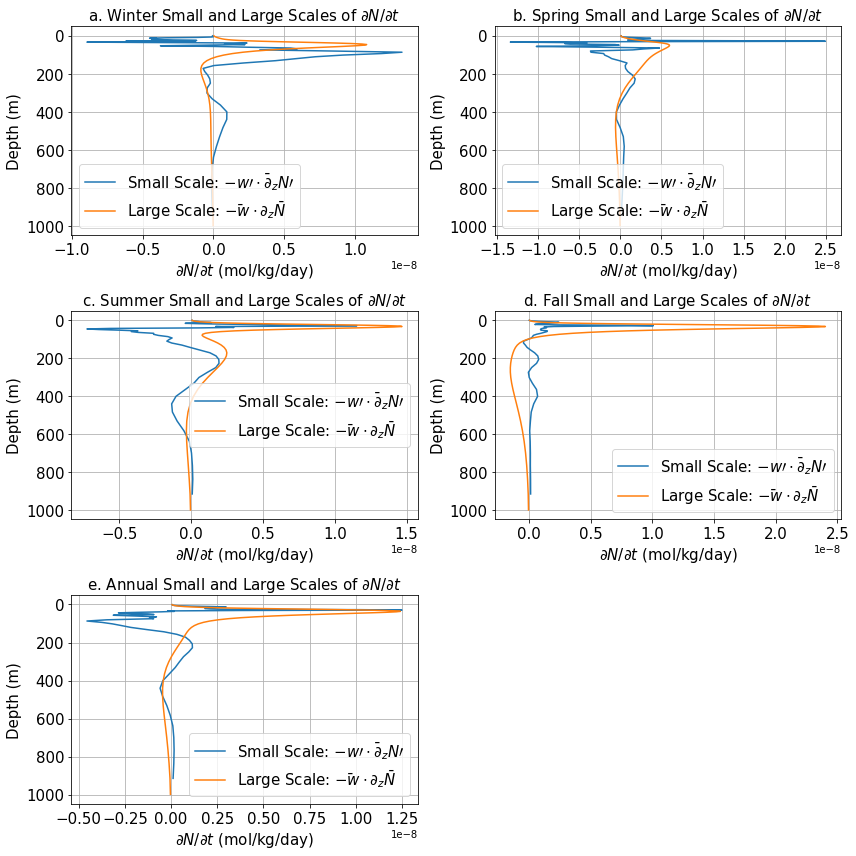

In [130]:
# graph seasonally 

from matplotlib.dates import DateFormatter

s=15

plt.figure(figsize=(12,12))

# Here we plot mixed layer and mixing layer depth for all 3 biomes 
# given data is in m

ax1 = plt.subplot(321)
(-avg_resid_transport1).plot(y='z_l', label=r'Small Scale: $\bar{-w\prime\cdot\partial_z N\prime}$')
avg_mean_transport1.plot(y='z_l', label=r'Large Scale: $\bar{-w}\cdot\partial_z\bar{N}$ ')
plt.gca().invert_yaxis(), plt.title(r'a. Winter Small and Large Scales of $\partial N/\partial t$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"$\partial N/\partial t$ (mol/kg/day)", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid()

ax2 = plt.subplot(322)
avg_resid_transport2.plot(y='z_l', label=r'Small Scale: $\bar{-w\prime\cdot\partial_z N\prime}$')
avg_mean_transport2.plot(y='z_l', label=r'Large Scale: $\bar{-w}\cdot\partial_z\bar{N}$ ')
plt.gca().invert_yaxis(), plt.title(r'b. Spring Small and Large Scales of $\partial N/\partial t$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"$\partial N/\partial t$ (mol/kg/day)", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid()

ax3 = plt.subplot(323)
avg_resid_transport3.plot(y='z_l', label=r'Small Scale: $\bar{-w\prime\cdot\partial_z N\prime}$')
avg_mean_transport3.plot(y='z_l', label=r'Large Scale: $\bar{-w}\cdot\partial_z\bar{N}$ ')
plt.gca().invert_yaxis(), plt.title(r'c. Summer Small and Large Scales of $\partial N/\partial t$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"$\partial N/\partial t$ (mol/kg/day)", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid()

ax4 = plt.subplot(324)
avg_resid_transport4.plot(y='z_l', label=r'Small Scale: $\bar{-w\prime\cdot\partial_z N\prime}$')
avg_mean_transport4.plot(y='z_l', label=r'Large Scale: $\bar{-w}\cdot\partial_z\bar{N}$ ')
plt.gca().invert_yaxis(), plt.title(r'd. Fall Small and Large Scales of $\partial N/\partial t$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"$\partial N/\partial t$ (mol/kg/day)", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid()

ax5 = plt.subplot(325)
annual_resid.plot(y='z_l', label=r'Small Scale: $\bar{-w\prime\cdot\partial_z N\prime}$')
annual_mean.plot(y='z_l', label=r'Large Scale: $\bar{-w}\cdot\partial_z\bar{N}$ ')
plt.gca().invert_yaxis(), plt.title(r'e. Annual Small and Large Scales of $\partial N/\partial t$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"$\partial N/\partial t$ (mol/kg/day)", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid()


plt.tight_layout()
plt.savefig("fig8.pdf", format="pdf", bbox_inches="tight")



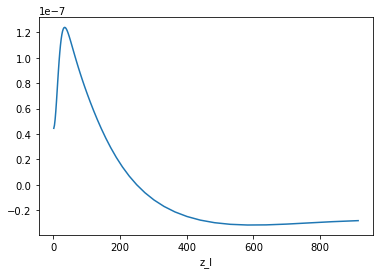

In [95]:
total_w_prime = (w_prime1 +  w_prime2 +  w_prime3 +  w_prime4)/4
total_dNO3dz_prime = (dNO3dz_prime1 + dNO3dz_prime2 + dNO3dz_prime3 + dNO3dz_prime4)/4


total.mean(dim=['xh','yh']).plot()

In [81]:
dNO3dz_prime1 = -1*dNO3dz_prime1
dNO3dz_prime2 = -1*dNO3dz_prime2
dNO3dz_prime3 = -1*dNO3dz_prime3
dNO3dz_prime4 = -1*dNO3dz_prime4

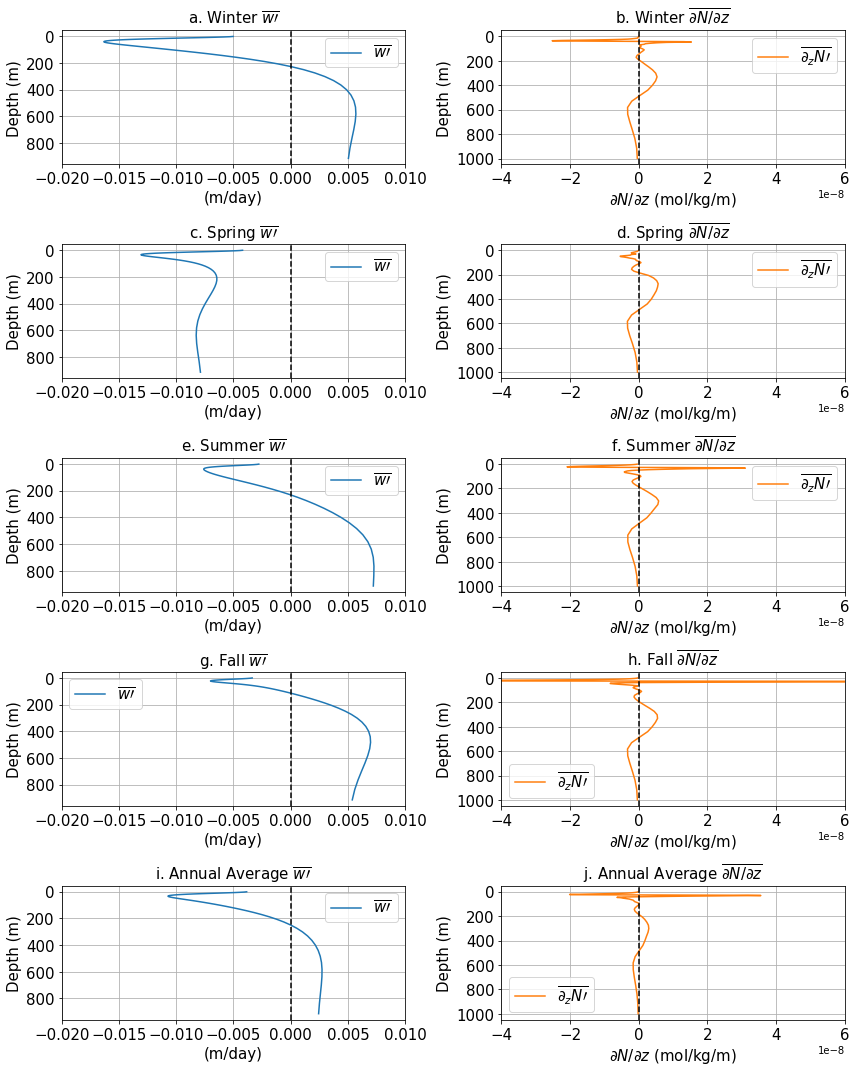

In [132]:
# graph seasonally 

from matplotlib.dates import DateFormatter

s=15

plt.figure(figsize=(12,15))

# Here we plot mixed layer and mixing layer depth for all 3 biomes 
# given data is in m

ax1 = plt.subplot(521)
(-86400*w_prime1).mean(dim=['xh','yh']).plot(y='z_l', label=r'$\overline{w\prime}$')
plt.gca().invert_yaxis(), plt.title(r'a. Winter $\overline{w\prime}$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"(m/day)", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid(), plt.axvline(x = 0, color = 'k', linestyle='dashed'), plt.xlim(-.02,.01)

ax2 = plt.subplot(522)
(dNO3dz_prime1).mean(dim=['xh','yh']).plot(y='z_l', label=r'$\overline{\partial_z N\prime}$ ', color='tab:orange')
plt.gca().invert_yaxis(), plt.title(r'b. Winter $\overline{\partial N/\partial z}$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"$\partial N/\partial z$ (mol/kg/m)", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid(), plt.axvline(x = 0, color = 'k', linestyle='dashed'), plt.xlim(-4e-8,6e-8)

ax3 = plt.subplot(523)
(-86400*w_prime2).mean(dim=['xh','yh']).plot(y='z_l', label=r'$\overline{w\prime}$')
plt.gca().invert_yaxis(), plt.title(r'c. Spring $\overline{w\prime}$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"(m/day)", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid(), plt.axvline(x = 0, color = 'k', linestyle='dashed'), plt.xlim(-.02,.01)

ax4 = plt.subplot(524)
(dNO3dz_prime2).mean(dim=['xh','yh']).plot(y='z_l', label=r'$\overline{\partial_z N\prime}$ ', color='tab:orange')
plt.gca().invert_yaxis(), plt.title(r'd. Spring $\overline{\partial N/\partial z}$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"$\partial N/\partial z$ (mol/kg/m)", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid(), plt.axvline(x = 0, color = 'k', linestyle='dashed'), plt.xlim(-4e-8,6e-8)

ax5 = plt.subplot(525)
(-86400*w_prime3).mean(dim=['xh','yh']).plot(y='z_l', label=r'$\overline{w\prime}$')
plt.gca().invert_yaxis(), plt.title(r'e. Summer $\overline{w\prime}$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"(m/day)", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid(), plt.axvline(x = 0, color = 'k', linestyle='dashed'), plt.xlim(-.02,.01)

ax6 = plt.subplot(526)
(dNO3dz_prime3).mean(dim=['xh','yh']).plot(y='z_l', label=r'$\overline{\partial_z N\prime}$ ', color='tab:orange')
plt.gca().invert_yaxis(), plt.title(r'f. Summer $\overline{\partial N/\partial z}$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"$\partial N/\partial z$ (mol/kg/m)", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid(), plt.axvline(x = 0, color = 'k', linestyle='dashed'), plt.xlim(-4e-8,6e-8)

ax7 = plt.subplot(527)
(-86400*w_prime4).mean(dim=['xh','yh']).plot(y='z_l', label=r'$\overline{w\prime}$')
plt.gca().invert_yaxis(), plt.title(r'g. Fall $\overline{w\prime}$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"(m/day)", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid(), plt.axvline(x = 0, color = 'k', linestyle='dashed'), plt.xlim(-.02,.01)

ax8 = plt.subplot(528)
(dNO3dz_prime4).mean(dim=['xh','yh']).plot(y='z_l', label=r'$\overline{\partial_z N\prime}$ ', color='tab:orange')
plt.gca().invert_yaxis(), plt.title(r'h. Fall $\overline{\partial N/\partial z}$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"$\partial N/\partial z$ (mol/kg/m)", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid(), plt.axvline(x = 0, color = 'k', linestyle='dashed'), plt.xlim(-4e-8,6e-8)

ax9 = plt.subplot(529)
(-86400*total_w_prime).mean(dim=['xh','yh']).plot(y='z_l', label=r'$\overline{w\prime}$')
plt.gca().invert_yaxis(), plt.title(r'i. Annual Average $\overline{w\prime}$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"(m/day)", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid(), plt.axvline(x = 0, color = 'k', linestyle='dashed'), plt.xlim(-.02,.01)

ax8 = plt.subplot(5,2,10)
(total_dNO3dz_prime).mean(dim=['xh','yh']).plot(y='z_l', label=r'$\overline{\partial_z N\prime}$ ', color='tab:orange')
plt.gca().invert_yaxis(), plt.title(r'j. Annual Average $\overline{\partial N/\partial z}$', fontsize=15), plt.legend(fontsize=s), plt.ylabel("Depth (m)", fontsize=s), plt.xlabel(r"$\partial N/\partial z$ (mol/kg/m)", fontsize=s), plt.xticks(fontsize=s), plt.yticks(fontsize=s), plt.grid(), plt.axvline(x = 0, color = 'k', linestyle='dashed'), plt.xlim(-4e-8,6e-8)




plt.tight_layout()
plt.savefig("fig9.pdf", format="pdf", bbox_inches="tight")

